In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_data = pd.read_excel(r"C:\\Users\\JEYA KUMAR R\\Downloads\\Data_Train_lyst6947.xlsx")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace = True)

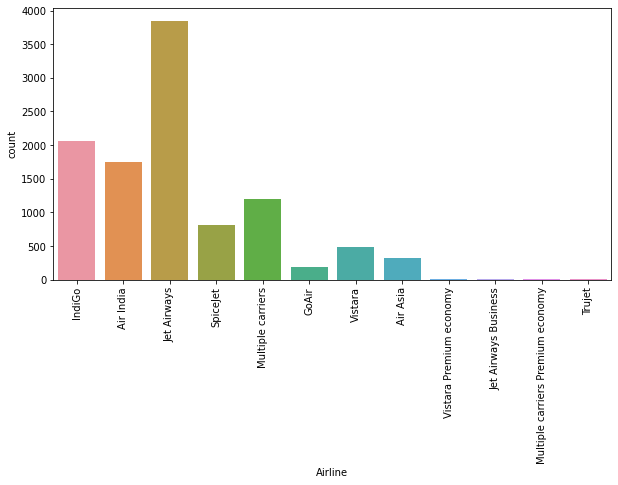

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(train_data['Airline'])
plt.xticks(rotation = 90)
plt.show()

In [14]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [15]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

We can see that, few airlines belonging to the same company have different names. So, we will try and combines these same airlines. Jet Airways & Jet Airways Business Air India & Air Asia & GoAir Vistara & Vistara Premium economy

In [16]:
train_data[train_data['Airline'] == 'Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [17]:
train_data[train_data['Airline'] == 'Jet Airways'].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
13,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663


In [18]:
train_data['Airline'] = train_data['Airline'].str.replace('Jet Airways Business', 'Jet Airways')

train_data['Airline'] = train_data['Airline'].str.replace('Air Asia', 'Air India')

train_data['Airline'] = train_data['Airline'].str.replace('GoAir', 'Air India')

train_data['Airline'] = train_data['Airline'].str.replace('Vistara Premium economy', 'Vistara')

train_data['Airline'] = train_data['Airline'].str.replace('Multiple carriers Premium economy', 'Multiple carriers')

In [20]:
train_data['Airline'].value_counts()

Jet Airways          3855
Air India            2264
IndiGo               2053
Multiple carriers    1209
SpiceJet              818
Vistara               482
Trujet                  1
Name: Airline, dtype: int64

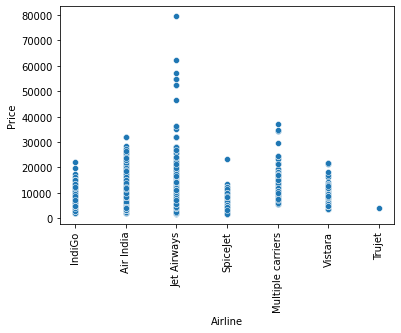

In [21]:
sns.scatterplot('Airline', 'Price', data = train_data)
plt.xticks(rotation = 90)
plt.show()

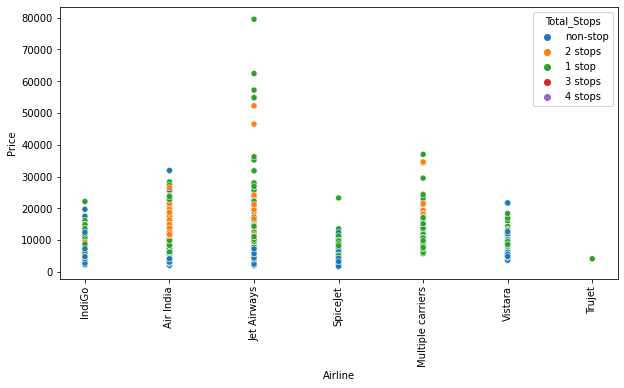

In [22]:
plt.figure(figsize = (10,5))
sns.scatterplot('Airline', 'Price', data = train_data, hue = 'Total_Stops')
plt.xticks(rotation = 90)
plt.show()

In [23]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
#As Additional_Info has 80% no info as it is of no use
#and route and total stops are realted to each other therfore dropping route

In [25]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


Our model is not capable of understanding columns like Date_of_Journey, so we will have to make seperate columns for date, month and year

In [26]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
train_data["Journey_year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [27]:
train_data.drop(["Date_of_Journey", 'Journey_year'], axis = 1, inplace = True)

In [28]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [29]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [30]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
train_data['Total_Stops'] = label_enc.fit_transform(train_data['Total_Stops'])
#'non-stop', '2 stops', '1 stop', '3 stops', '4 stops'
#4, 1, 0, 2, 3

In [31]:
train_data['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Dep_Time       10682 non-null  object
 4   Arrival_Time   10682 non-null  object
 5   Duration       10682 non-null  object
 6   Total_Stops    10682 non-null  int32 
 7   Price          10682 non-null  int64 
 8   Journey_day    10682 non-null  int64 
 9   Journey_month  10682 non-null  int64 
dtypes: int32(1), int64(3), object(6)
memory usage: 1.1+ MB


Now extracting Dep_Hour and Dep_min from Dep_Time using pd.datetime as Dep_Time is of object datatype and cannot be understand by the model

In [33]:
train_data['Dep_hr'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [34]:
train_data.drop('Dep_Time', axis = 1, inplace = True) #dropping the Dep_Time column

In [35]:
#similarly, extracting Arrival_Hour and Arrival_min from Arrival_Time using pd.datetime as Dep_Time is of 
#object datatype and cannot be understand by the model

In [36]:
train_data['Arrival_hr'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [37]:
train_data.drop("Arrival_Time", axis = 1, inplace = True)#dropping the Arrival_Time column

In [38]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,4,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,1,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,1,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,0,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,0,13302,1,3,16,50,21,35


<AxesSubplot:xlabel='Source', ylabel='count'>

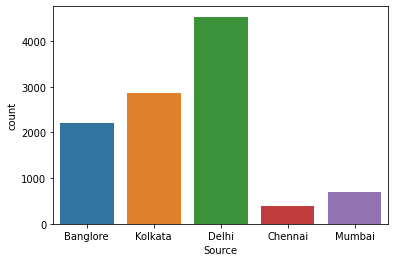

In [39]:
sns.countplot(train_data['Source'])

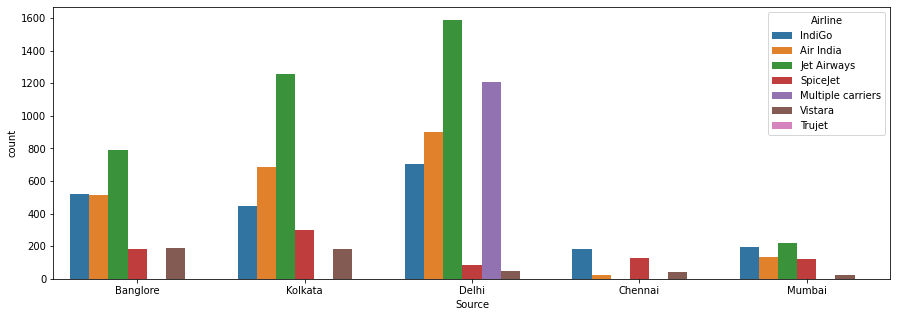

In [40]:
plt.figure(figsize = (15, 5))
sns.countplot(train_data['Source'], hue = train_data['Airline'])
plt.show()

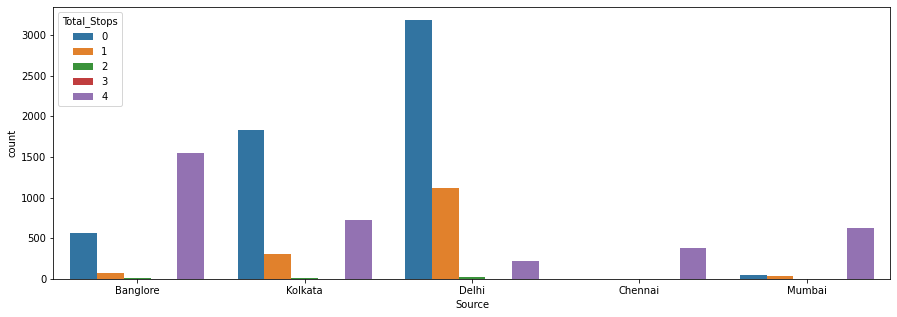

In [41]:
plt.figure(figsize = (15, 5))
sns.countplot(train_data['Source'], hue = train_data['Total_Stops'])
plt.show()

<AxesSubplot:xlabel='Destination', ylabel='count'>

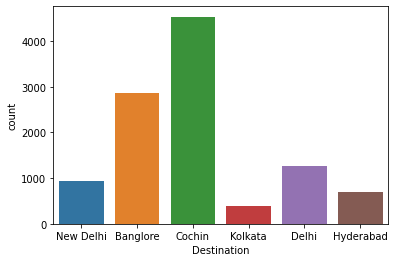

In [42]:
sns.countplot(train_data['Destination'])

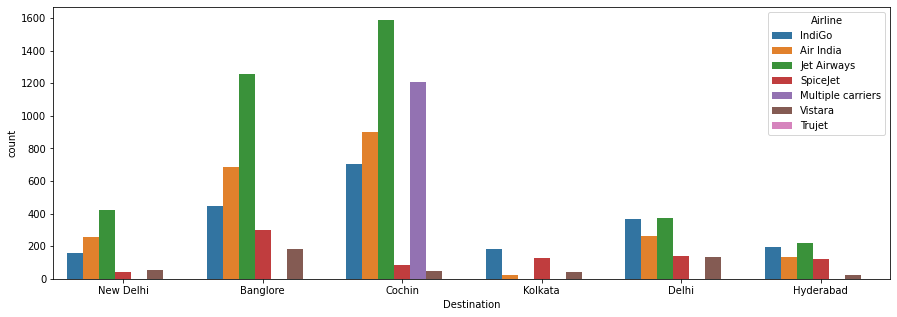

In [43]:
plt.figure(figsize = (15, 5))
sns.countplot(train_data['Destination'], hue = train_data['Airline'])
plt.show()

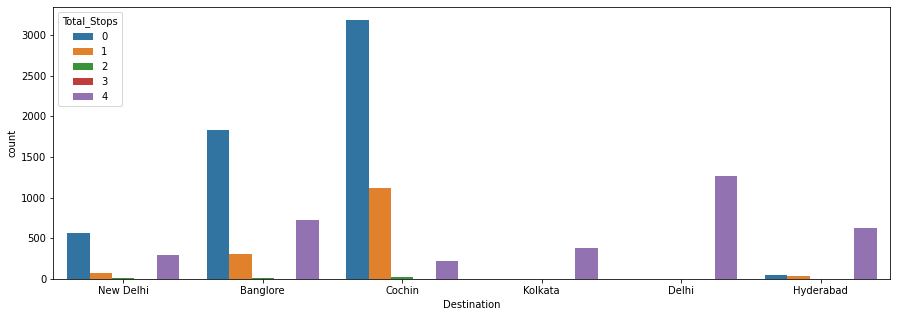

In [44]:
plt.figure(figsize = (15, 5))
sns.countplot(train_data['Destination'], hue = train_data['Total_Stops'])
plt.show()

In [45]:
train_data['Journey_month'].unique()
# 3 - March
# 4 - April
# 5 - May
# 6 - June

array([3, 5, 6, 4], dtype=int64)

<AxesSubplot:xlabel='Journey_month', ylabel='count'>

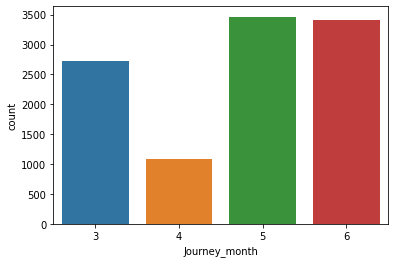

In [47]:
sns.countplot(train_data['Journey_month'])
#majority people like to travel in the months of may-june 

In [48]:
train_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [49]:
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # does not have either h or m['2h', '50m']
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   #if only 2h then add 0m to make it 2h 0m
        else:
            duration[i] = "0h " + duration[i]          #if only 50m then add 0h to make it 0h 50m

#we are doing this step so that our duration list has the similar type of elements, so it becomes easy to perform operations on
#similar type of elements

#strip() - The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters 
#          (space is the default leading character to remove)

#now appending hours in duration_hrs list and mins in duration_mins list
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    #first - splliting '2h 50' using 'h' becomes - ['2', ' 50m'] and then taking only 2 by [0]
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
     #first splliting '2h 50m' using split(m) and taking[0] of ['2h 50', ''] and then again splliting '2h 50' using split()
    # we get ['2h', '50'] then we take only the last element therefore [-1]


In [50]:
#dur = '2h 50m'
#var = dur.split('m')
#var
#var[0].split()

In [51]:
#n = '2h'
#p = n.split('h')
#p[0]

In [52]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_mins'] = duration_mins

In [54]:
train_data.drop('Duration', axis = 1, inplace = True)

In [55]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,1,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,35,4,45


In [56]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'Vistara', 'Trujet'], dtype=object)

In [57]:
#performing one hot encoding on Airline column
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline

,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
10678,0,0,0,0,0,0
10679,0,0,0,0,0,0
10680,0,1,0,0,0,0
10681,0,0,0,0,0,1


In [58]:
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [60]:
#similarly on destination column
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [61]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [62]:
#similarly on source column
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [63]:
#concatinating all the Airline, Source, Destination columns into the original data
train_data = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [65]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [66]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
lst = []
for i in range(0,25):
    val = train_data.iloc[0][i]
    lst.append(val)
lst

[4,
 3897,
 24,
 3,
 22,
 20,
 1,
 10,
 2,
 50,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [68]:
test_data = pd.read_excel(r"C:\\Users\\JEYA KUMAR R\\Downloads\\Test_set_lyst5257.xlsx")

In [70]:
test_data.head()

,Airline,Date_Of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop
4,Air India,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop


In [74]:
# Pre Processing steps
#dropping null values
test_data.dropna(inplace = True)

#combining all the same type of airlines
test_data['Airline'] = test_data['Airline'].str.replace('Jet Airways Business', 'Jet Airways')
test_data['Airline'] = test_data['Airline'].str.replace('Air Asia', 'Air India')
test_data['Airline'] = test_data['Airline'].str.replace('GoAir', 'Air India')
test_data['Airline'] = test_data['Airline'].str.replace('Vistara Premium economy', 'Vistara')
test_data['Airline'] = test_data['Airline'].str.replace('Multiple carriers Premium economy', 'Multiple carriers')

#handling the Date_of_Journey columns
test_data["Journey_day"] = pd.to_datetime(test_data.Date_Of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_Of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_Of_Journey"], axis = 1, inplace = True)

#handling the Total_Stops columns
label_enc = LabelEncoder()
test_data['Total_Stops'] = label_enc.fit_transform(test_data['Total_Stops'])
#'non-stop', '2 stops', '1 stop', '3 stops', '4 stops'
#4, 1, 0, 2, 3

#Now extracting Dep_Hour and Dep_min from Dep_Time using pd.datetime as Dep_Time is of object datatype and cannot be understand by the model
test_data['Dep_hr'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time', axis = 1, inplace = True) #dropping the Dep_Time column

#similarly, extracting Arrival_Hour and Arrival_min from Arrival_Time using pd.datetime as Dep_Time is of 
#object datatype and cannot be understand by the model
test_data['Arrival_hr'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

test_data.drop("Arrival_Time", axis = 1, inplace = True)#dropping the Arrival_Time column

# Assigning and converting Duration column into list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # does not have either h or m['2h', '50m']
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   #if only 2h then add 0m to make it 2h 0m
        else:
            duration[i] = "0h " + duration[i]          #if only 50m then add 0h to make it 0h 50m

#we are doing this step so that our duration list has the similar type of elements, so it becomes easy to perform operations on
#similar type of elements

#strip() - The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters 
#          (space is the default leading character to remove)

#now appending hours in duration_hrs list and mins in duration_mins list
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    #first - splliting '2h 50' using 'h' becomes - ['2', ' 50m'] and then taking only 2 by [0]
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
     #first splliting '2h 50m' using split(m) and taking[0] of ['2h 50', ''] and then again splliting '2h 50' using split()
    # we get ['2h', '50'] then we take only the last element therefore [-1]
    
test_data['Duration_hours'] = duration_hours
test_data['Duration_mins'] = duration_mins

test_data.drop('Duration', axis = 1, inplace = True)

#performing one hot encoding on Airline column
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline

#similarly on destination column
Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

#similarly on source column
Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

#concatinating all the Airline, Source, Destination columns into the original data
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)

test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [75]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,17,30,4,25,10,55,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,4,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [76]:
test_data.shape

(2671, 23)

In [77]:
train_data.shape

(10682, 25)

In [78]:
#Now finally our training and tesing data is ready

# Peforming Feature Selection

In [80]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Trujet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [82]:
feature_train_data = train_data[['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hours',
       'Duration_mins',]]
feature_train_data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins
0,4,3897,24,3,22,20,1,10,2,50
1,1,7662,1,5,5,50,13,15,7,25
2,1,13882,9,6,9,25,4,25,19,0
3,0,6218,12,5,18,5,23,30,5,25
4,0,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,19,55,22,25,2,30
10679,4,4145,27,4,20,45,23,20,2,35
10680,4,7229,27,4,8,20,11,20,3,0
10681,4,12648,1,3,11,30,14,10,2,40


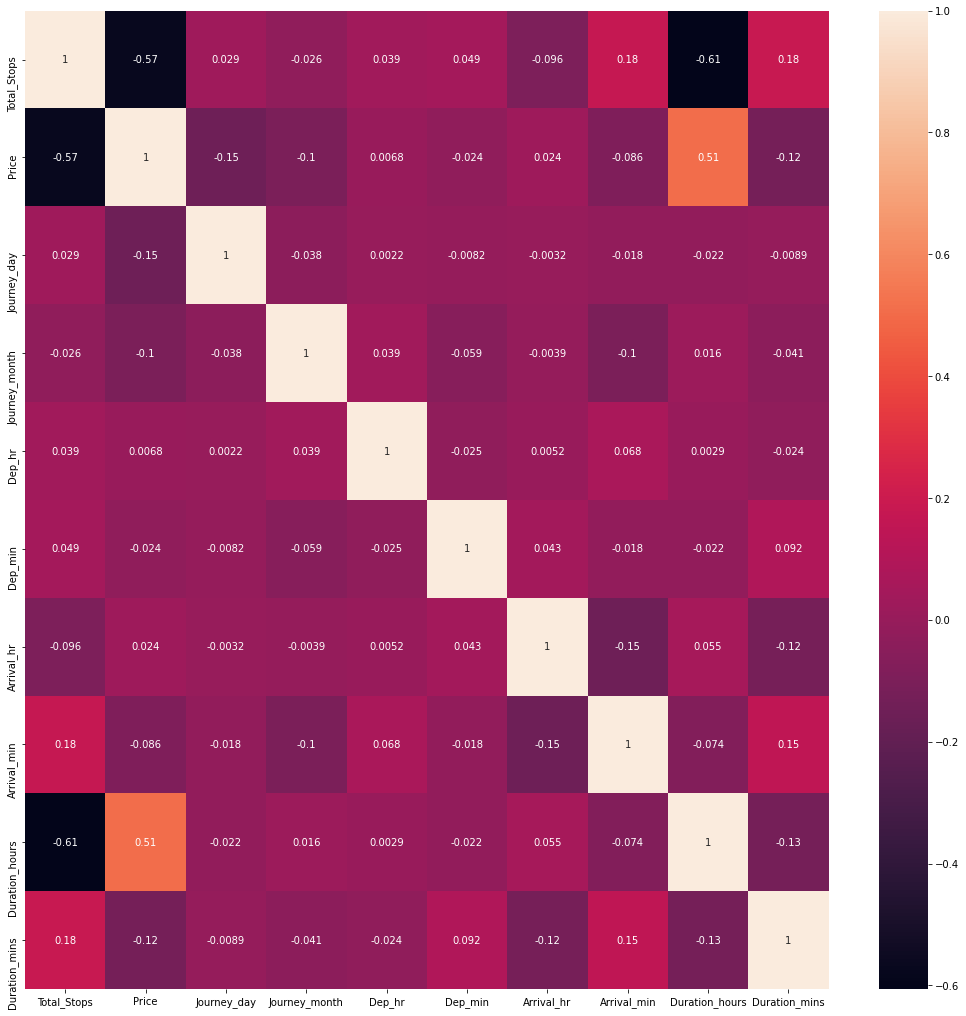

In [83]:
#correlation Matrix
plt.figure(figsize = (18,18))
sns.heatmap(ftr_train_data.corr(), annot = True) 
# all the other columns relation won't effect
plt.show()

In [84]:
#we are getting negative correlation between Total_Stops and Duration_hours because we have encode th Total_stops as
# before label_encoding - {"non-stop": 4, "1 stop": 0, "2 stops": 1, "3 stops": 2, "4 stops": 3}
# after label_encoding - 4, 1, 0, 2, 3

#if we would have done encoding like {"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}
#we would have got a positive correlation

Performing Variance Inflation Factor to check Multicollinearity

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
x = train_data.drop('Price', axis = 1)
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hours,Duration_mins,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,24,3,22,20,1,10,2,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,9,6,9,25,4,25,19,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,12,5,18,5,23,30,5,25,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,3,16,50,21,35,4,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [87]:
x.shape

(10682, 24)

In [88]:
y = train_data['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [89]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

In [90]:
vif_data.head()
#check only the top 8 columns as only those columns are important
# we remove a columns if its VIF is >=5
# Here, we will not remove any features

,feature,VIF
0,Total_Stops,3.034798
1,Journey_day,1.028981
2,Journey_month,1.308475
3,Dep_hr,1.056878
4,Dep_min,1.061235


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [93]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8545, 24)
(2137, 24)
(8545,)
(2137,)


RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state = 1)
reg_rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=1)

In [95]:
ypred = reg_rf.predict(xtest)

In [96]:
reg_rf.score(xtrain, ytrain)
#training score

0.9539812767750444

In [98]:
reg_rf.score(xtest, ytest)
#testing score

0.771542174887506

In [99]:
from sklearn.metrics import r2_score, mean_squared_error

In [100]:
r2_score(ytest, ypred)

0.771542174887506

In [103]:
from sklearn import metrics

In [105]:
print('MAE:', metrics.mean_absolute_error(ytest, ypred))
print('MSE:', metrics.mean_squared_error(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE: 1215.0688851250657
MSE: 5081613.482472693
RMSE: 2254.2434390439494


In [106]:
from xgboost import XGBRegressor

In [107]:
reg_xgb = XGBRegressor()
reg_xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
xgb_ypred = reg_xgb.predict(xtest)

In [109]:
reg_xgb.score(xtest, ytest)
#testing score

0.8024165619637263

In [110]:
r2_score(ytest, xgb_ypred)

0.8024165619637263

In [111]:
print('MAE:', metrics.mean_absolute_error(ytest, xgb_ypred))
print('MSE:', metrics.mean_squared_error(ytest, xgb_ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, xgb_ypred)))

MAE: 1187.5188729728445
MSE: 4394870.966420341
RMSE: 2096.394754434465


## Doing Hyper Parameter Tunning on RandomFroestRegressor

In [112]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [115]:
param_grid = {
    'n_estimators' : range(100,1000,100),
    'max_depth' : range(1,30,1),
    'max_leaf_nodes' : range(1,50,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split' : [2, 5, 10, 15, 100],
    'max_features' : ['auto', 'sqrt'],
}
#try 1 - {'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
#try 2 - {'max_depth': 17, 'max_features': 'auto', 'max_leaf_nodes': 6, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}

In [116]:
grid_rf = RandomizedSearchCV(estimator=reg_rf , param_distributions = param_grid, n_jobs=-1, verbose = 3, cv = 10, 
                             random_state = 1, n_iter = 10, scoring='neg_mean_squared_error')

In [117]:
grid_rf.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 30),
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': range(1, 50),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': range(100, 1000, 100)},
                   random_state=1, scoring='neg_mean_squared_error', verbose=3)

In [118]:
best_parameters = grid_rf.best_params_
print(best_parameters)

{'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 7, 'max_leaf_nodes': 48, 'max_features': 'sqrt', 'max_depth': 10}


In [119]:
new_reg_rf = RandomForestRegressor(n_estimators = 300,
 min_samples_split = 15,
 min_samples_leaf =  7,
 max_features = 'auto',
 max_depth = 10)

In [120]:
new_reg_rf.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=10, min_samples_leaf=7, min_samples_split=15,
                      n_estimators=300)

In [121]:
reg_rf_ypred = new_reg_rf.predict(xtest)

In [122]:
r2_score(ytest, reg_rf_ypred)

0.7907530392053033

In [123]:
print('MAE:', metrics.mean_absolute_error(ytest, reg_rf_ypred))
print('MSE:', metrics.mean_squared_error(ytest, reg_rf_ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, reg_rf_ypred)))

MAE: 1304.096002116953
MSE: 4654304.034528844
RMSE: 2157.3836085705398


## Doing Hyper Parameter Tunning on XGBRegressor

In [124]:
#best
param_grid = {'n_estimators' : [100,200,300] ,
              'learning_rate': [0.05, 0.1, 0.15, 0.20] ,
              'max_depth': [3, 5, 10] ,
              'gamma' : [0.1, 0.2, 0.3] ,
              'min_child_weight' : [1, 3, 5, 7] ,    
}

In [125]:
grid_xgb = RandomizedSearchCV(estimator=reg_xgb , param_distributions = param_grid, n_jobs=-1, verbose = 3, cv = 10, 
                             random_state = 1, n_iter = 10, scoring='neg_mean_squared_error')

In [126]:
grid_xgb.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_pa..._state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1, subsamp

In [127]:
best_parameters = grid_xgb.best_params_
print(best_parameters)

{'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.2}


In [128]:
new_reg_xgb = XGBRegressor(n_estimators =  300, 
                           min_child_weight = 5, 
                           max_depth =  5, 
                           learning_rate =  0.15, 
                           gamma = 0.2)

In [129]:
new_reg_xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
reg_xgb_ypred = new_reg_xgb.predict(xtest)

In [131]:
print(r2_score(ytest, reg_xgb_ypred))

0.8276153417848048


In [132]:
print('MAE:', metrics.mean_absolute_error(ytest, reg_xgb_ypred))
print('MSE:', metrics.mean_squared_error(ytest, reg_xgb_ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, reg_xgb_ypred)))

MAE: 1176.9717811937917
MSE: 3834371.630415544
RMSE: 1958.155159944059


CONCLUSION - XGBRegressor has the highest accuracy and lowest RMSE

In [133]:
print(xtest.shape)

(2137, 24)


In [134]:
pwd()

'C:\\Users\\JEYA KUMAR R\\Desktop\\Mini'

In [144]:
import pickle
# open a file, where you ant to store the data
file = open('flight_price_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(new_reg_rf, file)

In [145]:
model = open('flight_price_xgb.pkl','rb')
classifier = pickle.load(model)

In [146]:
prediction = classifier.predict(xtest)

In [147]:
print(r2_score(ytest, prediction))

0.7907530392053033
